In [52]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import seaborn as sns
%matplotlib inline

In [53]:
data_path = '/Users/phuongnguyen/Documents/Code Github/geospatial-data-science-labs/london_house_project/london_house_price_data/london_house_price/kaggle_london_house_price_data.csv'
data = pd.read_csv(data_path)

In [54]:
print(data.columns)

Index(['fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating',
       'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'saleEstimate_valueChange.saleDate', 'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange'],
      dtype='object')


In [55]:
# Drop columns
data = data.drop(columns=['rentEstimate_lowerPrice',
       'rentEstimate_upperPrice', 'saleEstimate_upperPrice',
       'saleEstimate_confidenceLevel', 'saleEstimate_ingestedAt',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange',
       'history_date', 'history_price',
       'history_percentageChange', 'history_numericChange', 'saleEstimate_lowerPrice'])

# rename columns rent price and sale price
data = data.rename(columns={'rentEstimate_currentPrice': 'rent_price',
                           'saleEstimate_currentPrice': 'sale_price'})

print(data.head(5))

                                         fullAddress  postcode  country  \
0       Flat 9, 35 Furnival Street, London, EC4A 1JQ  EC4A 1JQ  England   
1       Flat 6, 35 Furnival Street, London, EC4A 1JQ  EC4A 1JQ  England   
2  Flat 35, Octavia House, Medway Street, London,...  SW1P 2TA  England   
3    24 Chester Court, Lomond Grove, London, SE5 7HS   SE5 7HS  England   
4              18 Alexandra Gardens, London, N10 3RL   N10 3RL  England   

  outcode   latitude  longitude  bathrooms  bedrooms  floorAreaSqM  \
0    EC4A  51.517282  -0.110314        1.0       1.0          45.0   
1    EC4A  51.517282  -0.110314        NaN       NaN           NaN   
2    SW1P  51.495505  -0.132379        2.0       2.0          71.0   
3     SE5  51.478185  -0.092201        1.0       1.0          64.0   
4     N10  51.588774  -0.139599        1.0       4.0         137.0   

   livingRooms     tenure        propertyType currentEnergyRating  rent_price  \
0          1.0  Leasehold  Purpose Built Flat  

In [56]:
data.describe()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,rent_price,sale_price
count,418201.000000,418201.000000,340270.000000,377665.000000,392991.000000,357701.000000,416460.000000,4.175610e+05
mean,51.507522,-0.101426,1.444265,2.474884,98.926543,1.282275,3639.487466,9.045188e+05
std,0.056171,0.086930,0.724478,1.160506,55.938911,0.574412,3487.801945,9.202917e+05
min,51.385708,-0.347055,1.000000,1.000000,10.000000,1.000000,350.000000,8.900000e+04
25%,51.464315,-0.155996,1.000000,2.000000,63.000000,1.000000,1950.000000,4.460000e+05
50%,51.501581,-0.108482,1.000000,2.000000,84.000000,1.000000,2600.000000,6.220000e+05
75%,51.548515,-0.043582,2.000000,3.000000,116.000000,1.000000,3950.000000,9.840000e+05
max,51.665823,0.139249,9.000000,9.000000,500.000000,9.000000,121200.000000,2.922000e+07


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418201 entries, 0 to 418200
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   fullAddress                        418201 non-null  object 
 1   postcode                           418201 non-null  object 
 2   country                            418201 non-null  object 
 3   outcode                            418201 non-null  object 
 4   latitude                           418201 non-null  float64
 5   longitude                          418201 non-null  float64
 6   bathrooms                          340270 non-null  float64
 7   bedrooms                           377665 non-null  float64
 8   floorAreaSqM                       392991 non-null  float64
 9   livingRooms                        357701 non-null  float64
 10  tenure                             406689 non-null  object 
 11  propertyType                       4170

In [86]:
# Fill bathrooms, livingrooms null values with median
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['livingRooms'].fillna(data['livingRooms'].median(), inplace=True)

# drop rows with null values
data_clean = data.dropna()

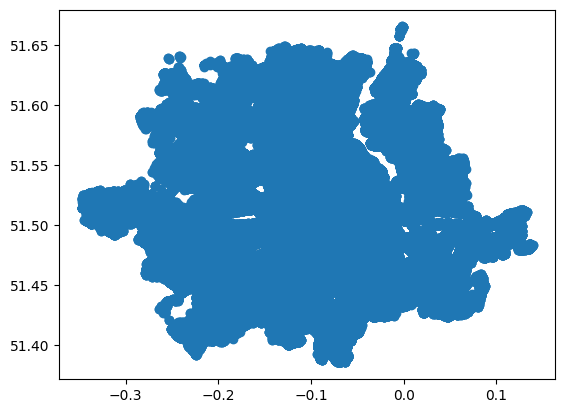

In [87]:
# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(data['longitude'],data['latitude'], 'o')
plt.show()

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


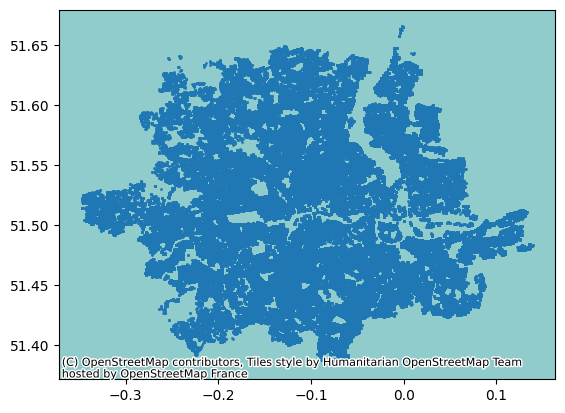

In [88]:
fig, ax = plt.subplots()
ax.plot(data['longitude'], data['latitude'], 'o', markersize=1)
ctx.add_basemap(ax)
plt.show()

In [89]:
houses = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data.longitude, data.latitude),
    crs="EPSG:4326"
)

In [90]:
# Load borough polygons
boroughs = gpd.read_file('/Users/phuongnguyen/Documents/Code Github/geospatial-data-science-labs/london_house_project/london_boroughs/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp')
boroughs = boroughs.to_crs("EPSG:4326")

In [91]:
# Spatial join to find which borough each house is in
houses_borough = gpd.sjoin(
    houses,
    boroughs,
    how="left",
    predicate="within"
)

In [92]:
# Calculate average price per borough
borough_price = (
    houses_borough
    .groupby("NAME")["sale_price"]
    .mean()          # hoặc median
    .reset_index()
)


In [64]:
boroughs_price = boroughs.merge(
    borough_price,
    on="NAME",
    how="left"
)


<Axes: >

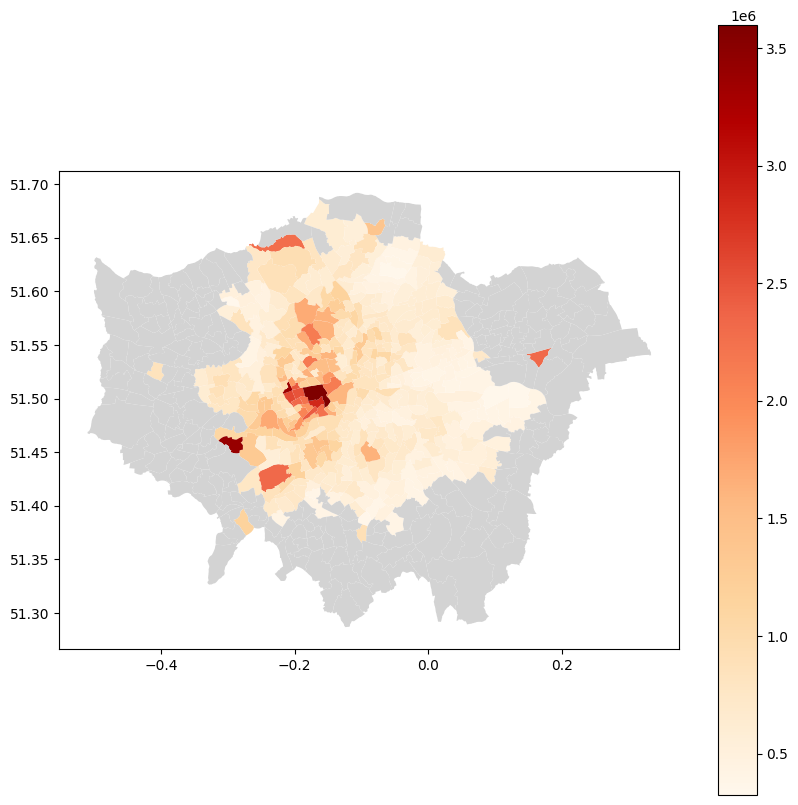

In [93]:
boroughs_price.plot(
    column="sale_price",
    cmap="OrRd",
    legend=True,
    figsize=(10, 10),
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)


In [94]:
# Drop missing values
boroughs_price_clean = boroughs_price.dropna(subset=["sale_price"])

# Global Spatial Autocorrelation

In [95]:
# Import libraries and package
from pysal.lib import weights
from pysal.explore import esda
from pysal.viz import splot
from splot.esda import plot_moran
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn
from IPython.display import display, Markdown, display_latex, display_markdown, display_html

Construct a spatial weights of the listings data:

- Use queen-based spatial weights matrix, row-standardized the weights martix. 
- Row-standardization means by dividing the weight for a feature by the sum of all neighbor weights for that same feature


In [96]:
# Construct a spatial weights
# Generate W from the GeoDataFrame
# Convert this to polygon data
w = weights.Queen.from_dataframe(boroughs_price_clean)

/var/folders/yt/4vlc63d57rz84q0w40rbc23w0000gn/T/ipykernel_66813/347637216.py:4: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(boroughs_price_clean)
/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 0, 33, 403.
  warnings.warn(message)


In [97]:
# Row-standarization 
w.transform = 'R'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 403, ' is an island (no neighbors)')


In [98]:
# Calcualte the spatial lag
lag_price = weights.spatial_lag.lag_spatial(w, boroughs_price_clean['sale_price'])

In [72]:
# Standardize the variable of interest and the lag variable
price_std = (boroughs_price_clean['sale_price'] - boroughs_price_clean['sale_price'].mean())
price_lag_std = (lag_price - lag_price.mean())

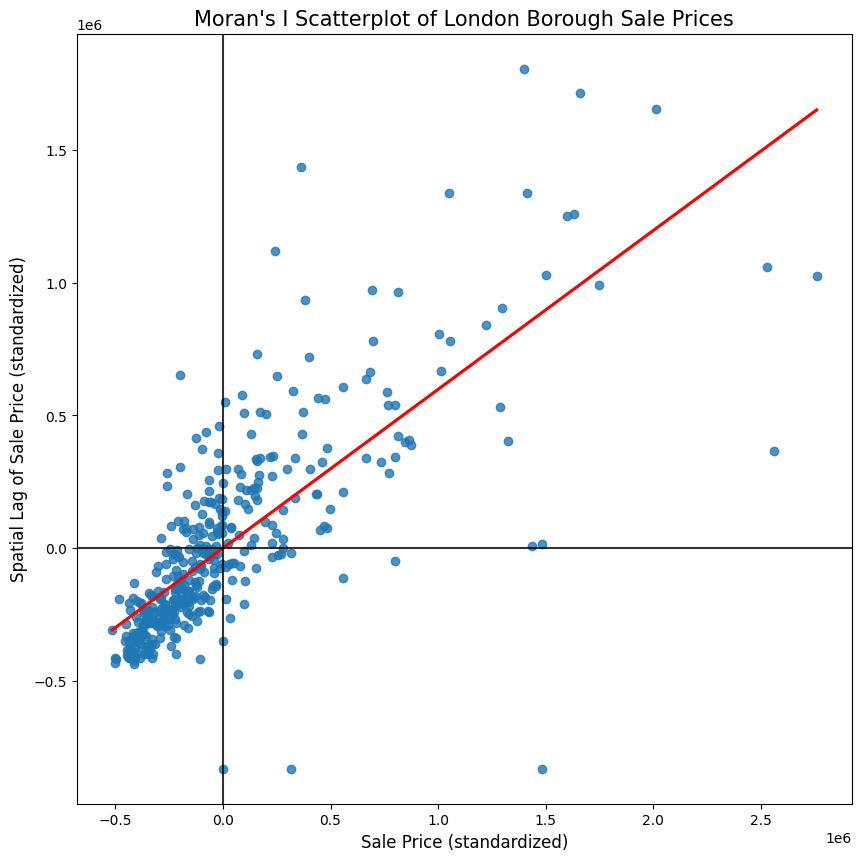

In [99]:
# Plot the spatial weights and spatial lag against one another to produce the Moran's I scatter plot
f, ax = plt.subplots(1, figsize=(10,10))

seaborn.regplot(
    x=price_std, #variable of interest
    y=price_lag_std, #spatial lag variable
    ci=None, # suppress the plotting of the confidence interval
    data=boroughs_price_clean,
    line_kws={'color':'r'}
)
ax.axvline(0, c='k', alpha = 0.8)
ax.axhline(0, c='k', alpha = 0.8)
ax.set_xlabel('Sale Price (standardized)', fontsize=12)
ax.set_ylabel('Spatial Lag of Sale Price (standardized)', fontsize=12)
ax.set_title("Moran's I Scatterplot of London Borough Sale Prices", fontsize=15)
plt.show()

The points in the upper-right quandrant have a positive global spatial autocorrelation, while the points in the lower-left quandrant have a negative autocorrelation.

A line of best fit, shaded red, is overlayed on the plot to show the strength of the relationship.

In [100]:
# Calculate Moran's I statistic
moran_stats = esda.Moran(boroughs_price_clean['sale_price'], w)
display(Markdown(f"""
- Moran's I: {moran_stats.I:.4f}
- p-value: {moran_stats.p_sim:.4f}
"""))


- Moran's I: 0.6188
- p-value: 0.0010


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.62', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.62)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

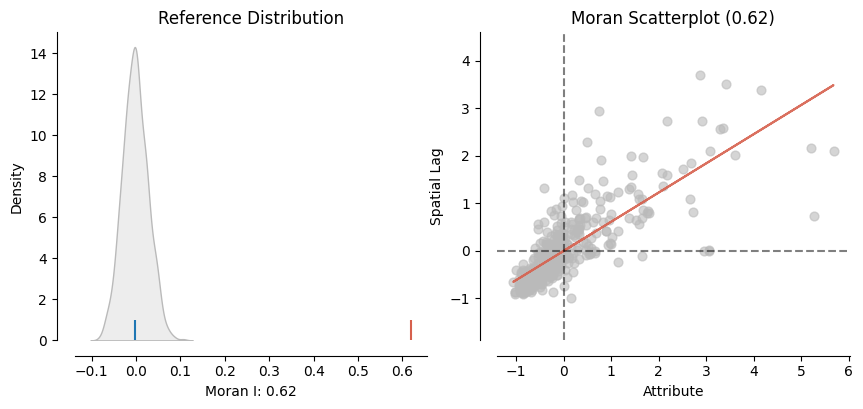

In [101]:
plot_moran(moran_stats)

Moran's I plot of London prices using plot moran

 There are other variables that can be explored for spatial autocorrelation <Recheck again>

In [104]:
boroughs_price_clean

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,sale_price
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.000,"POLYGON ((-0.27257 51.37227, -0.27263 51.37228...",1.156844e+06
5,Coombe Hill,E05000406,Kingston upon Thames,E09000021,442.170,0.000,"POLYGON ((-0.25634 51.43635, -0.25628 51.43637...",7.610714e+05
26,South Norwood,E05011485,Croydon,E09000008,214.118,0.000,"POLYGON ((-0.08733 51.38486, -0.08698 51.38578...",3.869191e+05
28,Shirley North,E05011482,Croydon,E09000008,310.902,0.000,"POLYGON ((-0.03679 51.377, -0.0369 51.37687, -...",4.125000e+05
31,Bensham Manor,E05011464,Croydon,E09000008,144.147,0.000,"POLYGON ((-0.10397 51.38893, -0.10401 51.38898...",6.231538e+05
...,...,...,...,...,...,...,...,...
613,Manor Park,E05000488,Newham,E09000025,133.487,0.000,"POLYGON ((0.03581 51.54756, 0.03514 51.54929, ...",4.841441e+05
614,Little Ilford,E05000487,Newham,E09000025,189.961,0.000,"POLYGON ((0.06522 51.54477, 0.06513 51.54478, ...",4.074767e+05
618,Village,E05000041,Barking and Dagenham,E09000002,214.748,0.000,"POLYGON ((0.1479 51.5416, 0.14821 51.54161, 0....",2.321235e+06
619,Abbey,E05000026,Barking and Dagenham,E09000002,128.292,2.655,"POLYGON ((0.08548 51.53704, 0.08535 51.53693, ...",7.316297e+05


In [106]:
# import numpy as np 
# from esda.moran import Moran 
# # Set seed for reproducibility
# np.random.seed(42)

# # Set the variable of interest
# variable_of_interest = ['bedrooms']

# for voi in variable_of_interest:
#     moran = Moran(boroughs_price_clean[voi], w)
#     print(f"Moran's I for {voi}: {moran.I}, p-value: {moran.p_sim}")
#     plot_moran(moran)
#     plt.show()

# Local Spatial Autocorelation

Local spatial autocorelation measures the relationship between each observation and its localized surroundings. Local spatial autocorelation does not return a single value but instead returns values per observation.

To do that, Local Indicators of Spatial Associations (LISAs) is used. 

In [107]:
# Leverage the Moran_Local() function to calculate the LISA for the price variable
price_lisa = esda.moran.Moran_Local(boroughs_price_clean['sale_price'], w)

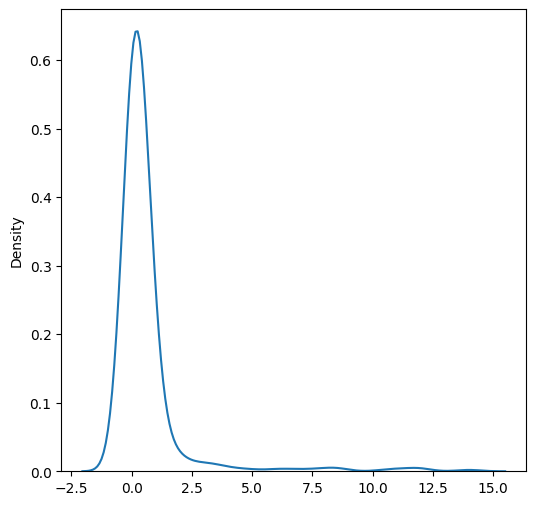

In [111]:
# Plot the distribution of the Is attribute of the price_list object
# Draw KDE line
f, ax = plt.subplots(1, figsize=(6, 6))

seaborn.kdeplot(price_lisa.Is, ax=ax)
plt.show()

From the distribution, we can see that a massive spike in the data around 0 with a long right tail. This is mainly due to the presence of a large number of observations with positive spatial autocorrelation, which is in line with what we discovered from the global measures.

/Users/phuongnguyen/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


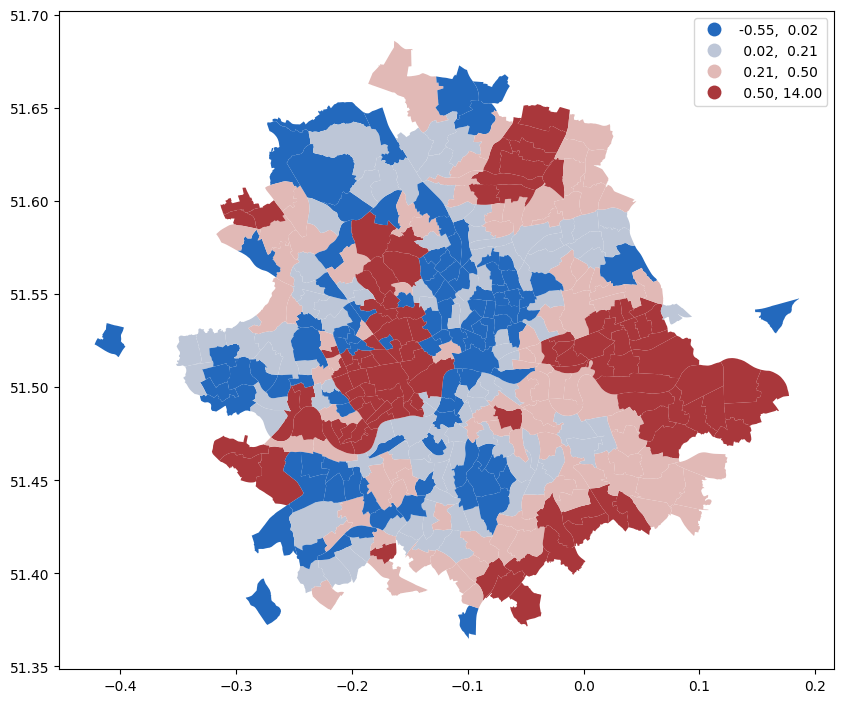

In [112]:
# Create a choropleth map of the Local Moran's I values
f, ax = plt.subplots(1, figsize=(10, 10))

# Create a new column with the values from the Moran's Local LISAs 
boroughs_price_clean['lisa_I'] = price_lisa.Is

# Plot choropleth of local statistics
boroughs_price_clean.plot(
    column="lisa_I",
    cmap="vlag",
    scheme='quantiles',
    k=4,
    figsize=(10, 10),
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    },
    legend=True,
    ax=ax
)
plt.show()

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

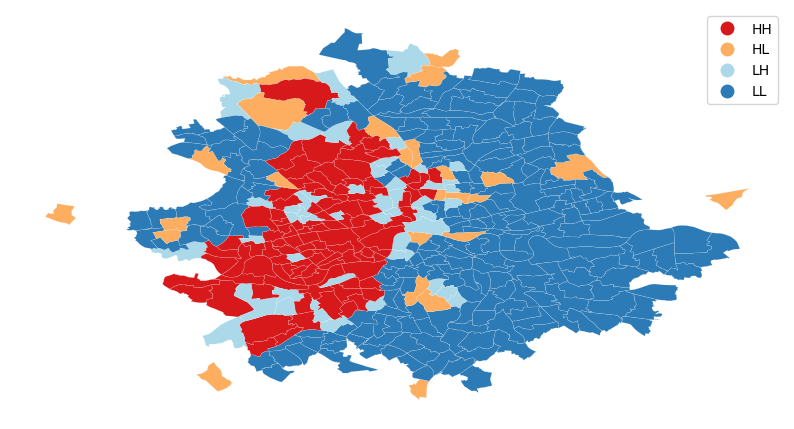

In [115]:
# Plot the map of all the observations, assigning each observation to its quadrants: High-High, Low-Low, High-Low, Low-High

from splot import esda as esdaplot

f, ax = plt.subplots(1, figsize=(10, 10))

esdaplot.lisa_cluster(
    price_lisa,
    boroughs_price_clean,
    p=1,
    ax=ax
)


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

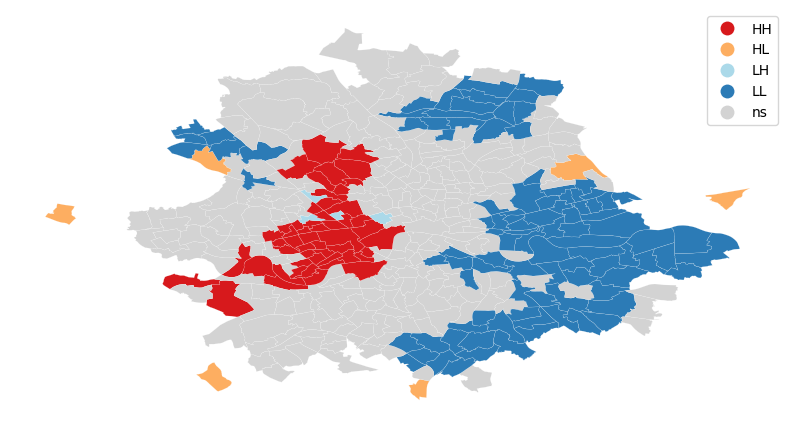

In [116]:
f, ax = plt.subplots(1, figsize=(10, 10))

esdaplot.lisa_cluster(
    price_lisa,
    boroughs_price_clean,
    p=0.05,
    ax=ax
)

# Point pattern analysis